# Problems for Session 6 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import scipy.optimize as opt
from scipy.optimize import fsolve
from scipy import integrate

### Problem 1: (These are just exercises)

###### Theory: 
A matrix has a form $Ax = b$. Therefore, to solve for $x$, applying the property of an inverse matrix we get:  $$x = A^{-1}\times b $$ where $A^{-1}$ is the inverse matrix of A. Analytically can be solve as: $$A^{-1} = \frac{1}{det(A)} \times adj(A) $$

On the other hand, a property of an identity matrix tells us that for any matrix A $$ A \times I = I \times A = A $$ i.e., by multiplying any matrix A with the identity matrix of the same order, we get the same matrix as the product.

source: https://www.cuemath.com/algebra/identity-matrix/

##### Problem 1a
Say, you have the equation system, given by $$x+0.5y-2=0$$ and $$4x+5y=2$$ Write this up in matrix notation and solve the system using matrix inversion in Python.


In [23]:
A = np.array([[1, 0.5], [4, 5]])
b = np.array([[2], [2]])
x = np.transpose(np.linalg.inv(A) @ b)
print(f'The matrix has a solution of x and y = {x}')

#To see if the propery of the identity matrix holds
test = np.transpose(A @ np.transpose(x))
print(f'The answer should equal to b, and it is: {test}')

The matrix has a solution of x and y = [[ 3. -2.]]
The answer should equal to b, and it is: [[2. 2.]]


##### Problem 1b
Try to do the same with the following equation system: $$x+2y -4= 0$$ and $$5x+10y = 2$$ What happens?

In [24]:
A2 = np.array([[1, 2], [5, 10]])
b2 = np.array([[4], [2]])
x2 = np.linalg.inv(A2) @ b2

LinAlgError: Singular matrix

In [25]:
det = np.linalg.det(A2)
print(f'The determinant of matrix A = {det}')
print('Therefore, by the property of an identity matrix, our matrix does not have a solution because\n the determinant is equal to 0')

The determinant of matrix A = 0.0
Therefore, by the property of an identity matrix, our matrix does not have a solution because
 the determinant is equal to 0


##### Problem 1c
The function $f(a)$ is implicitly defined by the $x$ that solves the equation $$ax - e^x = 0$$ Define the function using a call to a solver from the Scipy library and plot the function.

When the function = 0, a = [-276.10007928]


/Users/angel/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/minpack.py:175: RuntimeWarning: The number of calls to function has reached maxfev = 400.
  warnings.warn(msg, RuntimeWarning)


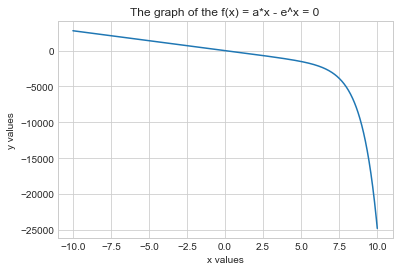

In [26]:
x = np.linspace(-10,10,1000)
f = lambda x, a = 0: a*x - np.exp(x) 
a = fsolve(f, 0)
print(f'When the function = 0, a = {a}')

plt.plot(x, f(x,a))
plt.xlabel("x values")
plt.ylabel("y values")
plt.title("The graph of the f(x) = a*x - e^x = 0")
plt.show()

##### Problem 1d
The function $f(a)$ is implicitly defined by the $x$ that maximizes $$e^{-0.5x^2}+ax$$ Define the function using a call to a minimizer from the Scipy library and plot the function.

the value of x where y is at minimum = 1.0


Text(0, 0.5, 'y values')

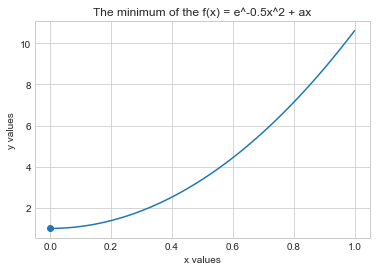

In [27]:
a = np.linspace(0,10,100) 
x = np.linspace(0,1,100) 
parameter = [a, x]

def f(params): 
    a = params[0]
    x = params[1]
    funct = np.exp(-0.5*x**2) + a*x
    return funct

startval = [0, 0]
result = opt.minimize(f, startval, method = 'BFGS')

if result.success: 
    fitted_params = result.x
    print(f'the value of x where y is at minimum = {result.fun}')
    
else: 
    raise ValueError(result.message)

plt.plot(x, f(parameter))
plt.scatter(result.x[0], f(result.x))
plt.title('The minimum of the f(x) = e^-0.5x^2 + ax')
plt.xlabel('x values')
plt.ylabel('y values')

### Problem 2: Hicksian variations, consumer surplus

In this problem, we are going to work with two utility functions:
$$ u_1 = 0.6 log x + 0.4 log y$$
$$ u_2 = y + \frac{1}{1+\frac{1}{e} \times x^{1+\frac{1}{e}}}$$

Derive a demand curve (for good $x$ as a price of $x$ for each of the utility functions). Assume that $income = 10$ and the price of good $y$ is 1.

We will consider a price change from 1 to 2 on good $x$. Our problem concerns how to measure the cost to the consumer (the welfare consequences) of the price change. (The reason this is not trivial is that the consumer can adjust demand, right!)

##### Problem 2a
One way to measure the welfare effects of such a price change is the change in consumer surplus. Compute the change in consumer surplus (that would be the area between the demand curve and the price going from $x=0$ to $x=x(p)$ for the two different prices. Do this for both utility functions.

Case A: $ u_1 = 0.6 log x + 0.4 log y$

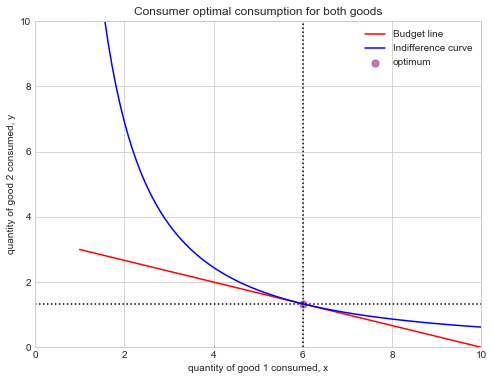

In [28]:
def utility_1(x, y): 
    ''' -u(x, y) because we want to minimize later the expenditures subject to fixed level of utility '''
    return - 0.6*np.log(x) - 0.4*np.log(y)

def utility_budget_1(x, mylist):
    income = mylist[0]
    price_x = mylist[1] 
    price_y = mylist[2]
    y = (income - price_x*x)/price_y
    return utility_1(x, y)
    
def demand_1(income, price_x, price_y): 
    x = opt.minimize(utility_budget_1, 0.1, method = 'Nelder-Mead', args = ([income, price_x, price_y], )).x
    y = (income - price_x*x)/price_y
    return x, y

def indiff_dist_1(y, mylist): 
    x = mylist[0] 
    utility_level = mylist[1]
    utility_achieved = utility_1(x, y)
    return utility_achieved - utility_level

def indifference_1(x, u_bar):
    result = opt.newton(indiff_dist_1, 0.1, args = ([x, u_bar], ))
    return result

def indirect_utility_1(income, price_x, price_y): 
    x, y = demand_1(income, price_x, price_y)
    return utility_1(x, y)

# initialise quantiites of good 1 (x), income (I), and prices of the two goods
x = np.linspace(1, 10, 100) 
I = 10 
p1 = 1 
p2 = 3

# get indirect utility curve here
utility_level = indirect_utility_1(I, p1 , p2)
y = np.zeros((100, 1))

for element in range(len(x)):
    y[element] = indifference_1(x[element], utility_level)

# plot the consumer's budget and indifference curve
plt.figure(figsize = (8, 6))
plt.plot(x, I/p2 - x*p1/p2, color = 'red', label = 'Budget line')
plt.plot(x, y, color = 'blue', label = 'Indifference curve') 

# identify optimum
x_star = demand_1(I, p1, p2)[0] 
y_star = demand_1(I, p1, p2)[1]
plt.scatter(x_star, y_star, s=50, alpha=0.5, color = 'purple', label = 'optimum')
plt.vlines(x_star, 0, 35, linestyles = 'dotted', color = 'k')
plt.hlines(y_star, 0, 30, linestyles = 'dotted', color = 'k')

plt.xlabel('quantity of good 1 consumed, x') 
plt.ylabel('quantity of good 2 consumed, y')
plt.title('Consumer optimal consumption for both goods') 
plt.legend(loc = 'upper right')
plt.ylim(0, 10) 
plt.xlim(0, 10) 
plt.show()

/var/folders/yf/6hqzqjrx1cq648tm_nv4ljqw0000gn/T/ipykernel_8098/966029061.py:3: RuntimeWarning: invalid value encountered in log
  return - 0.6*np.log(x) - 0.4*np.log(y)


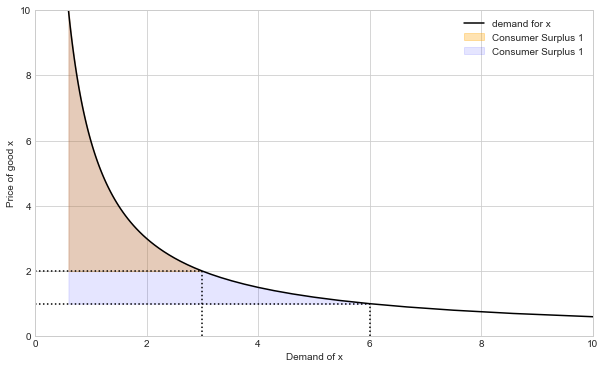

In [29]:
n = 100
prices_x = np.linspace(0.1, 10, n) #Variations in prices for X good
price_y = 1 #Keep it constant
income = 10
demandx = np.zeros(n) 
demandy = np.zeros(n)

def demandX(pricex):
    for price in range(n):
        demandx[price], demandy[price] = demand_1(income, prices_x[price], price_y)
    return demandx

demandx = demandX(prices_x)

plt.figure(figsize = (10, 6))
plt.plot(demandx,prices_x, '-k', label = 'demand for x')

idx1 = np.argwhere(prices_x == 1) 
idx2 = np.argwhere(prices_x == 2)

d1 = demand_1(income, prices_x[idx1], price_y) 
d2 = demand_1(income, prices_x[idx2], price_y) #does it mean that demand is the same ?

plt.vlines(d1[0], 0, 1, color = 'black', linestyle = 'dotted') 
plt.vlines(d2[0], 0, 2, color = 'black', linestyle = 'dotted')

plt.hlines(1, 0, 6, color = 'black', linestyle = 'dotted') #why do you have the dotter lines ?
plt.hlines(2, 0, 3, color = 'black', linestyle = 'dotted')

# fill_between
plt.fill_between(demandx, 2, prices_x, where = (prices_x >= 1) & (prices_x >=2),
                 color = 'orange', alpha = 0.3, label = "Consumer Surplus 1")
plt.fill_between(demandx, 1, prices_x, where = (prices_x >= 1),
                 color = 'blue', alpha = 0.1, label = "Consumer Surplus 1")


plt.xlabel('Demand of x') 
plt.ylabel('Price of good x') 
plt.legend()
plt.ylim(0, 10) 
plt.xlim(0, 10) 
plt.show()


#compute the consumer surplus using integrate
CS1 = integrate.quad(lambda x: opt.minimize(utility_budget_1, 0.1, method = 'Nelder-Mead', args = ([income, 1, price_y], )).x, 0, d1[0])[0]
CS2 = integrate.quad(lambda x: opt.minimize(utility_budget_1, 0.1, method = 'Nelder-Mead', args = ([income, 1, price_y], )).x, 0, d2[0])[0]


In [30]:
print(f'Consumer Surplus when Price of X is 1 = {CS1}')
print(f'Consumer Surplus when Price of X is 2 = {CS2}')
print(f'The Welfare loss = {CS1-CS2}')

Consumer Surplus when Price of X is 1 = 36.00000000000026
Consumer Surplus when Price of X is 2 = 18.000000000000128
The Welfare loss = 18.000000000000135


Case B: $ u_2 = y + \frac{1}{1+\frac{1}{e} \times x^{1+\frac{1}{e}}}$

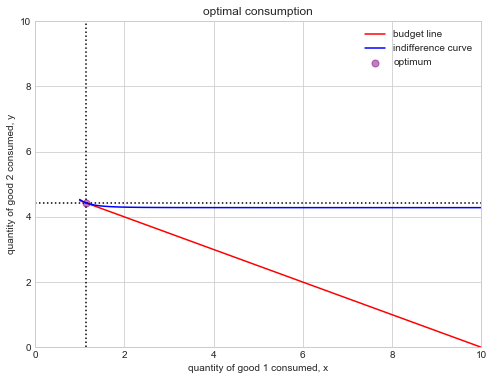

In [31]:
def utility_2(x, y): 
    ''' -u(x, y) because we want to minimize later the expenditures subject to fixed level of utility '''
    denominator = (1+1/(-e))
    return -y - (1/denominator)*x**(denominator)

def utility_budget_2(x, mylist):
    income = mylist[0] 
    price_x = mylist[1] 
    price_y = mylist[2]
    y = (income - price_x*x)/price_y
    return utility_2(x, y)
    
def demand_2(income, price_x, price_y): 
    x = opt.minimize(utility_budget_2, 0.1, method = 'Nelder-Mead', args = ([income, price_x, price_y], )).x
    y = (income - price_x*x)/price_y
    return x, y

def indiff_dist_2(y, mylist): 
    x = mylist[0] 
    utility_level = mylist[1]
    utility_achieved = utility_2(x, y)
    return utility_achieved - utility_level

def indifference_2(x, u_bar):
    result = opt.newton(indiff_dist_2, 1, args = ([x, u_bar], ))
    return result

def indirect_utility_2(income, price_x, price_y): 
    x, y = demand_2(income, price_x, price_y)
    return utility_2(x, y)

# initialise quantiites of good 1 (x), income (I), and prices of the two goods
x = np.linspace(1, 10, 100) 
I = 10 
p1 = 1 
p2 = 2 
e = 0.2

# get indirect utility curve here
utility_level = indirect_utility_2(I, p1 , p2)
y = np.zeros((100, 1))

for element in range(len(x)):
    y[element] = indifference_2(x[element], utility_level)

# plot the consumer's budget and indifference curve
plt.figure(figsize = (8, 6))
plt.plot(x, I/p2 - x*p1/p2, color = 'red', label = 'budget line')
plt.plot(x, y, color = 'blue', label = 'indifference curve') 

# identify optimum
x_star = demand_2(I, p1, p2)[0] ; y_star = demand_2(I, p1, p2)[1]
plt.scatter(x_star, y_star, s=50, alpha=0.5, color = 'purple', label = 'optimum')
plt.vlines(x_star, 0, 35, linestyles = 'dotted', color = 'k')
plt.hlines(y_star, 0, 30, linestyles = 'dotted', color = 'k')

plt.xlabel('quantity of good 1 consumed, x') 
plt.ylabel('quantity of good 2 consumed, y')
plt.title('optimal consumption') 
plt.legend(loc = 'upper right')
plt.ylim(0, 10) 
plt.xlim(0, 10) 
plt.show()

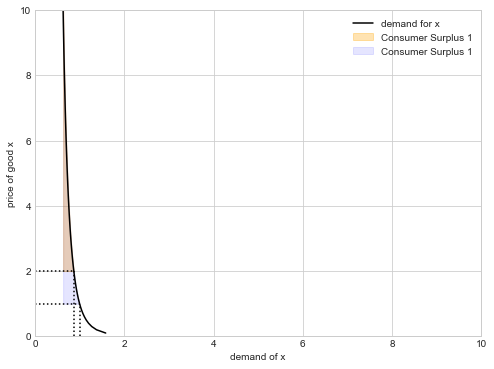

In [32]:
n = 100
prices_x = np.linspace(0.1, 10, n) 
price_y = 1 
income = 10
demandx = np.zeros(n) 
demandy = np.zeros(n)

def demandX(pricex):
    for price in range(n):
        demandx[price], demandy[price] = demand_2(income, prices_x[price], price_y)
    return demandx

demandx = demandX(prices_x)

plt.figure(figsize = (8, 6))
plt.plot(demandx,prices_x, '-k', label = 'demand for x')

idx1 = np.argwhere(prices_x == 1) 
idx2 = np.argwhere(prices_x == 2)
d1 = demand_2(income, prices_x[idx1], price_y) 
d2 = demand_2(income, prices_x[idx2], price_y) #does it mean that demand is the same ?
plt.vlines(d1[0], 0, 1, color = 'black', linestyle = 'dotted') 
plt.vlines(d2[0], 0, 2, color = 'black', linestyle = 'dotted') 
plt.hlines(1, 0, d1[0], color = 'black', linestyle = 'dotted') #why do you have the dotter lines ?
plt.hlines(2, 0, d2[0], color = 'black', linestyle = 'dotted')

# fill_between

plt.fill_between(demandx, 2, prices_x, where = (prices_x >= 1) & (prices_x >=2),
                 color = 'orange', alpha = 0.3, label = "Consumer Surplus 1")
plt.fill_between(demandx, 1, prices_x, where = (prices_x >= 1),
                 color = 'blue', alpha = 0.1, label = "Consumer Surplus 1")


plt.xlabel('demand of x') 
plt.ylabel('price of good x') 
plt.legend()
plt.ylim(0, 10) 
plt.xlim(0, 10) 
plt.show()

#compute the consumer surplus using integrate
CS1 = integrate.quad(lambda x: opt.minimize(utility_budget_1, 0.1, method = 'Nelder-Mead', args = ([income, 1, price_y], )).x, 0, d1[0])[0]
CS2 = integrate.quad(lambda x: opt.minimize(utility_budget_1, 0.1, method = 'Nelder-Mead', args = ([income, 1, price_y], )).x, 0, d2[0])[0]


In [33]:
print(f'Consumer Surplus when Price of X is 1 = {CS1}')
print(f'Consumer Surplus when Price of X is 2 = {CS2}')
print(f'The Welfare loss = {CS1-CS2}')

Consumer Surplus when Price of X is 1 = 6.00000000000004
Consumer Surplus when Price of X is 2 = 5.223281250000035
The Welfare loss = 0.776718750000005


##### Problem 2b
Compute the “equivalent variation” for both utility functions. (How much would the consumer be willing to pay to not experience the price increase?)

Source: https://www.youtube.com/watch?v=ABXlkPmnjN4&ab_channel=EconomicsinManyLessons

Case A: $ u_1 = 0.6 log x + 0.4 log y$

In [34]:
def diff_indirect_utilities(income_to_be_found,longlist):
    
    income1 = longlist[0]
    px1 = longlist[1] 
    py1 = longlist[2]
    px2 = longlist[3] 
    py2 = longlist[4]
    
    return indirect_utility_1(income_to_be_found,px2,py2) - indirect_utility_1(income1, px1, py1)

# define the things we need
I = 10 
pricex_1 = 1 
pricey_1 = 1 
pricex_2 = 2 
pricey_2 = 1 

'''So this should find the income level that would together with prices 1 and 1 (the last two arguments)
 would give the same utility as an income level of 10, together with prices 2 and 1'''

a = opt.newton(diff_indirect_utilities, 1, args = ([I, pricex_1, pricey_1, pricex_2, pricey_2], ))

print(f'The new income {a}, the consumer utility at the original prices is equivalent to the utility with an income of 10 at the new prices.') 
print(f"Compensation for welfare loss (EV): {np.abs(I - a)}")

The new income [15.15716567], the consumer utility at the original prices is equivalent to the utility with an income of 10 at the new prices.
Compensation for welfare loss (EV): [5.15716567]


Case B: $ u_2 = y + \frac{1}{1+\frac{1}{e} \times x^{1+\frac{1}{e}}}$

In [35]:
def diff_indirect_utilities_2(income_to_be_found,longlist):
    
    income1 = longlist[0]
    px1 = longlist[1] 
    py1 = longlist[2]
    px2 = longlist[3] 
    py2 = longlist[4]
    
    return indirect_utility_2(income1, px1, py1) - indirect_utility_2(income_to_be_found,px2,py2)

# define the things we need
income = 10 
pricex_1 = 1 
pricey_1 = 1 
pricex_2 = 2 
pricey_2 = 1 

'''So this should find the income level that would together with prices 1 and 1 (the last two arguments)
 would give the same utility as an income level of 10, together with prices 2 and 1'''

a = opt.newton(diff_indirect_utilities_2, 1, args = ([income, pricex_1, pricey_1, pricex_2, pricey_2], ))

print(f'The new income {a}, the consumer utility at the original prices is equivalent to the utility with an income of 10 at the new prices.') 
print(f"Compensation for welfare loss (EV): {np.abs(I - a)}")

The new income [10.92637641], the consumer utility at the original prices is equivalent to the utility with an income of 10 at the new prices.
Compensation for welfare loss (EV): [0.92637641]


##### Problem 2c
Compute the “compensating variation” for both utility functions. (How much do you need to compensate the consumer for the price change to keep her equally happy?)

Comment: As mentioned from the youtube video. For a small change in price, all 3 measures of consumer welfare are very similar. Therefore, EV is approximately equal to CV.

### Problem 3
We will be spinning further on the Fisher model from the session 5 problems. We will now include production in the model. Our worker will supply one unit of labor every period. He starts with capital $k_1$ Production is given by the Cobb-Douglas production function $$F(L,K)=L^{0.6}\times K^{0.4}$$ The worker produces $F(1,k_1)$ in the first period. He can then choose to consume this or save for the next period. In the second period: $$k_2 = k_1 (1-delta) + s$$ where $ s = F(1,k_1) - c_1$:
- s is savings
- delta is depreciation of capital. 
- Consumption in period 2 is given by $F(1,k_2)+k_2$. (That is, since this is the last period, the worker will also consume the capital). 

The worker’s preferences are the same as in Session 5, problem 1.

In this model, the consumer does not face an interest rate and a "bank" but must do his saving in form of capital.

We know that: $k_2 = k_1 \times ( 1 - delta) + s $ where $s = F(1,k_1) - c_1$

Period 2 production is given by $F(1,k_2)$ and period 2 consumption is given by

$$ c_2 = F(1,k_2) + k_2 $$

So we substitute for $k_2$ which gives us: 

$$ c_2 = F(1,k_1(1-delta) + s) + k_1 \times (1-delta) + s $$

and finally we substitute for $s$ 
$$ c_2 = F(1,k_1(1-delta) + F(1,k_1) - c_1) + k_1\times(1-delta) + F(1,k_1) - c1 $$

Again, we can import our solution from Problem set 5 - problem 1:

##### Problem 3a
The worker in this model only needs to work out how much to save/invest. Implement this model so you can solve it numerically.

In [36]:
def p3a(arglist, e = 0.1, q = 0.04, r = 0):

    #Step 0: Define parameters, here we have default values for e, q and r
    K1 = arglist[0] 
    delta = arglist[1] 
    alpha = arglist[2]
    x = np.linspace(0.1,3,100) 
    savings = np.zeros(len(x))
    y = np.zeros(len(x))
    
    #Step 1: Define functions to calculate production and the endownments, also define K for the second period. 
    def production(labour, capital):
        return np.power(labour, alpha)*np.power(capital, 1 - alpha)

    def capital2(c1, delta, K1):
        return (K1) * (1 - delta) + production(1,K1) - c1
    
    K2 = capital2(x,delta,K1) 
    I1 = production(1,K1) 
    I2 = production(1,K2[0])

    #Step 2: Define utility and equivalent demand
    def utility(x, y):
        '''Returns the utility level of a given consumptino bundle'''
        return  x**e + (y**e)/(1+q)

    def utility_budget(x, mylist):
        '''Returns the utility level given the budget constraint'''
        endow1 = mylist[0] 
        endow2 = mylist[1] 
        r = mylist[2]
        y = endow2 + (endow1 - x)*(1 + r)
        return - utility(x, y) 

    def demand(endow1, endow2, r):
        '''Returns the demand of the good given consumption is maximised'''
        x = opt.minimize(utility_budget, 0.1, args = ([endow1, endow2, r], )).x
        y = endow2 + (endow1 - x)*(1 + r)
        return x, y

    #Step 3: Calculate indifference and indirect utility
    def indiff_dist(y, mylist): 
        '''Returns the distance between given utility level and utility of this combinaiton of consumption'''
        x = mylist[0] 
        utility_level = mylist[1]
        utitility_achieved = utility(x,y) 
        return utitility_achieved - utility_level

    def indifference(x, util):
        '''Returns the consumer's maximum utility level; the x-intercept of the indifference distace curve'''
        return fsolve(indiff_dist, 1, args = ([x,util], ))
    
    def indirect_utility(endow1, endow2, r):
        '''Returns the utility as a funciton of the prices and income when the consumer chooses consumption_t1 and
        consumption_t2 to maximise his utility''' 
        x, y = demand(endow1, endow2, r)
        return utility(x, y)

    #Step 4: Compute savings values and indifference for consumption in period 2
    for idx in range(len(x)):
        savings[idx] = production(1, K2[idx]) - x[idx] - delta*K1

    # get indirect utility curve 
    utility_level = indirect_utility(I1, I2, r)

    for element in range(len(x)):
        y[element] = indifference(x[element], utility_level)

    # Step 5: Plot the indifference curve of interporal consumption and the budget line. 
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14,6))
    ax1.plot(x, I2 + (I1 - x)*(1 + r), color = 'red', label = 'intertemporal budget line')
    ax1.plot(x, y, color = 'blue', label = 'intertemporal indifference curve') 
    x_star = demand(I1, I2, r)[0] 
    y_star = demand(I1, I2, r)[1]
    ax1.scatter(x_star, y_star, s=50, alpha=0.5, color = 'purple', label = 'optimum')
    ax1.set_xlabel('consumption today, x') 
    ax1.set_ylabel('consumption tomorrow, y')
    ax1.set_title('optimal consumption over two time periods') 
    ax1.legend(loc = 'upper right')

    #Step 6: Plot the savings
    ax2.plot(x,savings)
    ax2.hlines(0, min(savings), max(K2), color = 'grey') 
    ax2.vlines(0.46, -1, 1, color = 'grey')
    plt.show()


/var/folders/yf/6hqzqjrx1cq648tm_nv4ljqw0000gn/T/ipykernel_8098/4238335661.py:13: RuntimeWarning: invalid value encountered in power
  return np.power(labour, alpha)*np.power(capital, 1 - alpha)


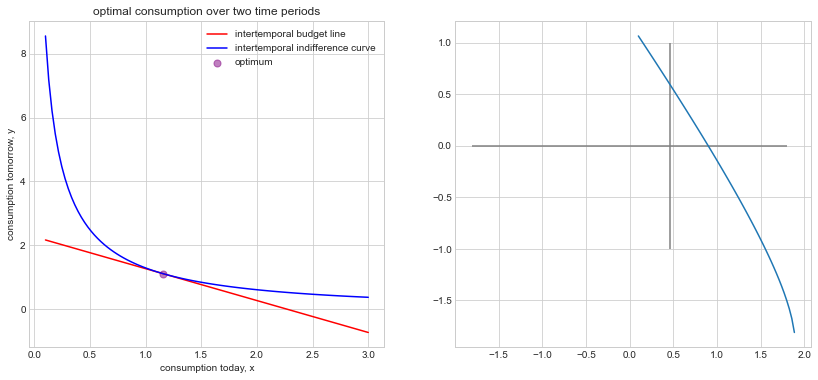

In [37]:
p3a([1,0.1,0.6])

In [38]:
def myutility(c1,c2,e,q):
    return c1**e+(1/(1+q))*c2**e

def bigF(lab,kap): #Production Function
    return lab**0.6*kap**0.4

def myutility_included_budget(c1,k1,delta,e,q):
    c2 = bigF(1,k1*(1-delta) + bigF(1,k1) - c1) + k1*(1-delta) + bigF(1,k1) - c1
    return - myutility(c1,c2,e,q) #Minimize

def mydemand(k1,delta,e,q):
    res = opt.minimize(myutility_included_budget,np.ones(1)*0.1,method='Nelder-Mead',args=(k1,delta,e,q))
    c1 = res['x']
    c2 = bigF(1,k1*(1-delta) + bigF(1,k1) - c1) + k1*(1-delta) + bigF(1,k1) - c1
    return c1, c2

In [39]:
c1, c2 = mydemand(1,0.02,0.1,0.04)
print(f'consumption in period 1  = {c1} and for period 2 = {c2}')
print(f'Since C2 = {c2} > C1 = {c1}, then our consumer is a saver.')

consumption in period 1  = [1.179375] and for period 2 = [1.71552085]
Since C2 = [1.71552085] > C1 = [1.179375], then our consumer is a saver.


##### Problem 3b
Figure out under what conditions the worker will choose to stabilize the capital stock such that $k_2=k_1$.

$k_2=k_1$ if $s = delta \times k1$. That is, if savings are enough to offset depreciation. 

In [40]:
k1 = 1
delta = 0.02
c1, c2 = mydemand(k1, delta, 0.1, 0.04)
s = bigF(1, k1) - c1
depreciation = delta * k1
print(f'Savings in Period 2 = {s}')
print(f'Depreciation rate = {depreciation}')
print(f'Consumption in period 1 = {c1}')
print(f'Consumption in period 2 = {c2}')

Savings in Period 2 = [-0.179375]
Depreciation rate = 0.02
Consumption in period 1 = [1.179375]
Consumption in period 2 = [1.71552085]


In the case above, our consumer has the opportunity to gain more capital in first period so it decides to invest more in the present period, and thereby has a negative savings (borrowing in the present time). Now, let's assume that the consumer has less capital.

In [41]:
k1 = 0.3
delta = 0.02
c1, c2 = mydemand(k1,delta,0.1,0.04)
s = bigF(1,k1) - c1
deprciation = delta*k1
print(f'Savings in Period 2 = {s}')
print(f'Depreciation rate = {depreciation}')
print(f'Consumption in period 1 = {c1}')
print(f'Consumption in period 2 = {c2}')

Savings in Period 2 = [0.05491023]
Depreciation rate = 0.02
Consumption in period 1 = [0.56289063]
Consumption in period 2 = [1.00518465]


With less capital in period 1, the consumer does not have an opportunity to accumulate capital hence it has to save so that it can consumer more in period 2. 

Text(0.5, 1.0, 'How a consumers savings rate varies according to his/her capital?')

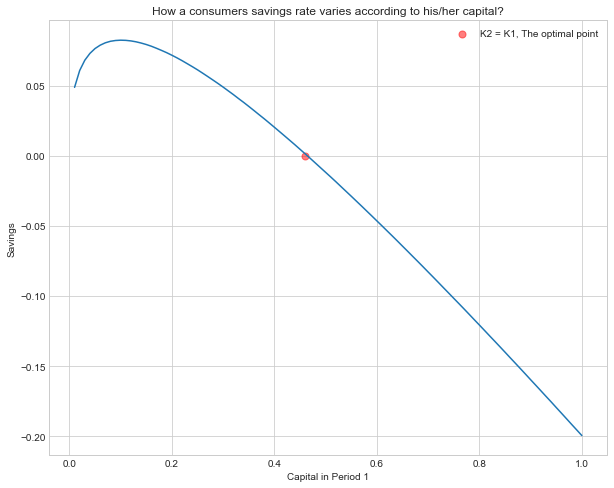

In [42]:
capital = np.linspace(0.01,1,100)
saving = np.zeros(100)

for i in range(100):
    c1, c2 = mydemand(capital[i],delta,0.1,0.04)
    saving[i] = bigF(1,capital[i])- c1 - delta*capital[i]
    
plt.subplots(figsize=(10,8))
plt.plot(capital, saving)
plt.scatter(0.46, 0, s=50, alpha=0.5, color = 'red', label = 'K2 = K1, The optimal point')
plt.xlabel('Capital in Period 1') 
plt.ylabel('Savings')
plt.legend(loc = 'upper right')
plt.title('How a consumers savings rate varies according to his/her capital?') 

### Problem 4

We learnt about monopoly. We are now going to have a market with a consumer demand curve and two or more producers. We start out with two. They will have capital stocks $k_1$ and $k_2$, and they produce using labor bought on a competetive market with wage $w$. Their production functions are: $$ F(l,k)=l^{0.7}k^{0.3}$$

The goods are homogeneous, so the producers will have to sell at the same price. Therefore, it is easiest to model their quantity decisions. They do take into account that the quantity they produce may affect the price. The firms do not take into account that their behavior may affect the behavior of other firms.


Hint: The oligopolist does not take into account the behavior of others, but he does take into account the production of others. Therefore, the production of oligopolist number 1 depends on the production of oligopolist number 2 etc. So this is really a system of equations. 

Solve this by assuming some starting values for production. Then solve for the production of oligopolist number 1, given the production of oligopolist number 2. Then solve for the production of oligopolist number 2, given the production of oligopolist number 1. If you do this four or five times, the production quantities will converge.


The consumers in this market has quasi-linear utility functions and the market demand function (here with price as a function of quantity) is given by: $$ p = D(x) = A \times x^{-0.5} $$

##### Problem 4a
Implement the model numerically.

In [49]:
def prod(kap, lab):
    alpha = 0.7
    return lab**alpha * kap**(1 - alpha)

def profits_olig(lab, other_supply, k, w):
    x = prod(k, lab)
    price = (other_supply + x)**(-0.5)
    profits = price*x - w*lab
    return -profits #since we minimise

def supply(other_supply, k, w):
    results = opt.minimize(profits_olig, 2, args = (other_supply, k, w), method = 'Nelder-Mead')
    lab = results.x
    x = prod(k, lab)
    return x, lab

def market_outcome(k1, k2, w):
    # starting values
    supply1 = 1 
    supply2 = 1
    
    for k in range(10):
        supply1, lab1 = supply(supply2, k1, w)
        supply2, lab2 = supply(supply1, k2, w)
        
    price = (supply1 + supply2)**(-0.5)
    return supply1, supply2, lab1, lab2, price

def market_outcome_system(supplies, k1, k2, w):
    supply0, lab0 = supply(supplies[1], k1, w)
    supply1, lab1 = supply(supplies[0], k2, w)
    out = np.zeros(2)
    out[0] = supply0 - supplies[0]
    out[1] = supply1 - supplies[1]
    return out


a = market_outcome_system((1, 1), 1, 1, 0.5)
print(f'When both firms has a supply of 1 and capital is held constant, and wage is 0.5, \n both firms produce {a}')

When both firms has a supply of 1 and capital is held constant, and wage is 0.5, 
 both firms produce [-0.30573937 -0.30573937]


/var/folders/yf/6hqzqjrx1cq648tm_nv4ljqw0000gn/T/ipykernel_8098/4111997643.py:3: RuntimeWarning: invalid value encountered in power
  return lab**alpha * kap**(1 - alpha)


In [50]:
#Function for finding the supply given capital
def market_outcome(k1, k2, w):
    res = opt.root(market_outcome_system, np.array((0.5, 0.5)), args = (k1, k2, w)).x
    return res

s1, s2 = market_outcome(1.4, 1.8, 0.5)
print(f'quantity supplied by firm 1 = {s1} and by firm 2 = {s2}')

quantity supplied by firm 1 = 0.8354536210252235 and by firm 2 = 0.9624327762028325


/var/folders/yf/6hqzqjrx1cq648tm_nv4ljqw0000gn/T/ipykernel_8098/4111997643.py:3: RuntimeWarning: invalid value encountered in power
  return lab**alpha * kap**(1 - alpha)


In [51]:
#Evalute the function at these values and check that it is close to zero
p1, p2 = market_outcome_system(np.array([0.83545362, 0.96243278]), 1.4, 1.8, 0.5)
print(f'if supply is same as above, then our optimal production converges to zero. \n firm 1 produced {p1} and firm 2 produced {p2}')


if supply is same as above, then our optimal production converges to zero. 
 firm 1 produced 1.0252234616814349e-09 and firm 2 produced -3.797167469343776e-09


/var/folders/yf/6hqzqjrx1cq648tm_nv4ljqw0000gn/T/ipykernel_8098/4111997643.py:3: RuntimeWarning: invalid value encountered in power
  return lab**alpha * kap**(1 - alpha)


##### Problem 4b
Figure out how quantities and profits depend on $k_1$ and $k_2$ (and compare the
quantities to how much the firms would produce if they were price takers in the
product market).

/var/folders/yf/6hqzqjrx1cq648tm_nv4ljqw0000gn/T/ipykernel_8098/4111997643.py:3: RuntimeWarning: invalid value encountered in power
  return lab**alpha * kap**(1 - alpha)


Text(0.5, 1.0, 'Dependency of profit and quantity on Capital')

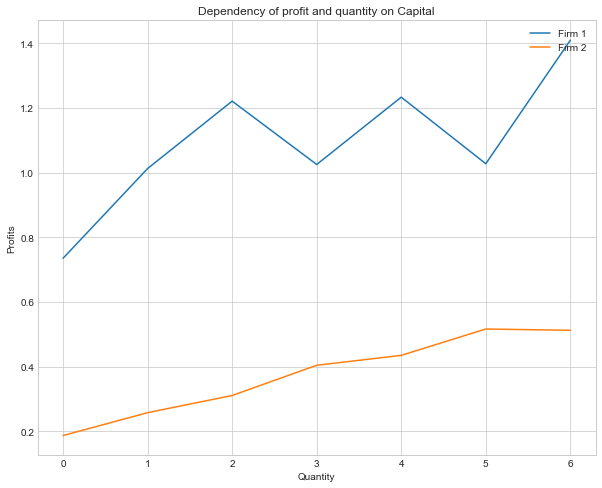

In [53]:
k1_s = np.array((1, 2, 3, 2, 3, 2, 4))
k2_s = np.array((0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7))
w = 0.5
firm1 = [] 
firm2 = []

for firm in range(7):
    f1, f2 = market_outcome(k1_s[firm], k2_s[firm], w)
    firm1.append(f1) 
    firm2.append(f2)

plt.subplots(figsize=(10,8))
plt.plot(firm1, label = 'Firm 1')
plt.plot(firm2, label = 'Firm 2')
plt.xlabel('Quantity') 
plt.ylabel('Profits')
plt.legend(loc = 'upper right')
plt.title('Dependency of profit and quantity on Capital') 


##### Problem 4c
Increase the number of firms to 3. Does the number of other firms matter for the
decision problem of firm 1?

In [55]:
# generalise to have as many firms as we would like
def market_outcome_system_many(supplies, ks, w):
    sumsupplies = np.sum(supplies)
    out = np.zeros_like(supplies)
    
    for i in range(len(supplies)):
        temp, lab = supply(sumsupplies - supplies[i], ks[i], w)
        out[i] = temp - supplies[i]
        
    return out

def market_outcome_many(ks, w):
    res = opt.root(market_outcome_system_many, np.ones(len(ks)), args = (ks, w))
    return res.x

# set some capital levels
ks = np.array((1, 2, 3, 2, 3, 2, 4))

x = market_outcome_many(ks, 1) # production levels/supplies of all the firms
check = market_outcome_system_many(x, ks, 1) # should be zero if x is correct

print(f'Production levels of all firms in the market: {x}')

/var/folders/yf/6hqzqjrx1cq648tm_nv4ljqw0000gn/T/ipykernel_8098/4111997643.py:3: RuntimeWarning: invalid value encountered in power
  return lab**alpha * kap**(1 - alpha)


Production levels of all firms in the market: [0.15196366 0.28355168 0.39916115 0.28355168 0.39916115 0.28355168
 0.50232016]
